# Import necessary libraries

In [6]:
# !pip install keras tensorflow

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
numpy.random.seed(7)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Load and explore the data

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [18]:
dataset=pd.read_csv("data/pima-indians-diabetes-data.csv")

In [19]:
dataset.head()

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
dataset.describe(include='all')

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Prepare training and testing data

In [21]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['diabetes'])

#check that the target variable has been removed
X.head()

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
#one-hot encode target column
Y = to_categorical(dataset.diabetes)

Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [23]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25, random_state=42)

In [24]:
print("Number of image in training set ",len(trainX), len(trainY))
print("Number of image in tesing set ",len(testX), len(testY))

Number of image in training set  576 576
Number of image in tesing set  192 192


# Create a model

In [54]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X.shape[1]

print(n_cols)
#add layers to model
model.add(Dense(12, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax')) # softmax

8


In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 18        
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [56]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # binary_crossentropy

# Train the model

In [58]:
# Fit the model
H = model.fit(trainX, trainY, epochs=150, batch_size=10, validation_data=(testX, testY))

Train on 576 samples, validate on 192 samples
Epoch 1/150
576/576 [==============================] - 0s 181us/step - loss: 0.5349 - acc: 0.7483 - val_loss: 0.6176 - val_acc: 0.7187
Epoch 2/150
576/576 [==============================] - 0s 131us/step - loss: 0.5367 - acc: 0.7448 - val_loss: 0.6032 - val_acc: 0.7031
Epoch 3/150
576/576 [==============================] - 0s 113us/step - loss: 0.5252 - acc: 0.7413 - val_loss: 0.5919 - val_acc: 0.6979
Epoch 4/150
576/576 [==============================] - 0s 114us/step - loss: 0.5262 - acc: 0.7448 - val_loss: 0.5692 - val_acc: 0.7240
Epoch 5/150
576/576 [==============================] - 0s 110us/step - loss: 0.5340 - acc: 0.7378 - val_loss: 0.5797 - val_acc: 0.7135
Epoch 6/150
576/576 [==============================] - 0s 104us/step - loss: 0.5313 - acc: 0.7517 - val_loss: 0.5836 - val_acc: 0.7188
Epoch 7/150
576/576 [==============================] - 0s 104us/step - loss: 0.5236 - acc: 0.7431 - val_loss: 0.6023 - val_acc: 0.7135
Epoch 8/1

Epoch 61/150
576/576 [==============================] - 0s 113us/step - loss: 0.4932 - acc: 0.7639 - val_loss: 0.6329 - val_acc: 0.7240
Epoch 62/150
576/576 [==============================] - 0s 103us/step - loss: 0.4899 - acc: 0.7674 - val_loss: 0.6498 - val_acc: 0.7187
Epoch 63/150
576/576 [==============================] - 0s 108us/step - loss: 0.5085 - acc: 0.7535 - val_loss: 0.5779 - val_acc: 0.7344
Epoch 64/150
576/576 [==============================] - 0s 120us/step - loss: 0.4854 - acc: 0.7726 - val_loss: 0.5497 - val_acc: 0.7656
Epoch 65/150
576/576 [==============================] - 0s 125us/step - loss: 0.4858 - acc: 0.7726 - val_loss: 0.6184 - val_acc: 0.7188
Epoch 66/150
576/576 [==============================] - 0s 106us/step - loss: 0.4814 - acc: 0.7674 - val_loss: 0.6109 - val_acc: 0.7344
Epoch 67/150
576/576 [==============================] - 0s 104us/step - loss: 0.4881 - acc: 0.7674 - val_loss: 0.5573 - val_acc: 0.7552
Epoch 68/150
576/576 [==========================

576/576 [==============================] - 0s 113us/step - loss: 0.4526 - acc: 0.8003 - val_loss: 0.5416 - val_acc: 0.7396
Epoch 122/150
576/576 [==============================] - 0s 119us/step - loss: 0.4680 - acc: 0.7812 - val_loss: 0.5406 - val_acc: 0.7500
Epoch 123/150
576/576 [==============================] - 0s 109us/step - loss: 0.4550 - acc: 0.7847 - val_loss: 0.5760 - val_acc: 0.7292
Epoch 124/150
576/576 [==============================] - 0s 108us/step - loss: 0.4672 - acc: 0.7812 - val_loss: 0.5514 - val_acc: 0.7344
Epoch 125/150
576/576 [==============================] - 0s 114us/step - loss: 0.4524 - acc: 0.7882 - val_loss: 0.5584 - val_acc: 0.7292
Epoch 126/150
576/576 [==============================] - 0s 105us/step - loss: 0.4636 - acc: 0.7847 - val_loss: 0.5412 - val_acc: 0.7656
Epoch 127/150
576/576 [==============================] - 0s 122us/step - loss: 0.4753 - acc: 0.7865 - val_loss: 0.5570 - val_acc: 0.7344
Epoch 128/150
576/576 [==============================] 

# Evaluate the results

In [59]:
# evaluate the model : train
scores = model.evaluate(trainX, trainY)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# evaluate the model : test
scores = model.evaluate(testX, testY)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

576/576 [==============================] - 0s 24us/step

acc: 79.34%
192/192 [==============================] - 0s 35us/step

acc: 75.52%


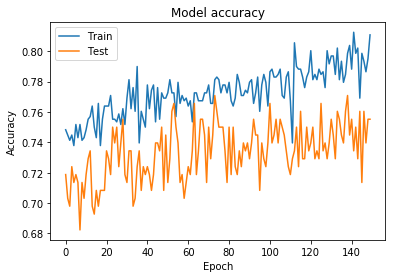

In [60]:
# Plot training & validation accuracy values
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

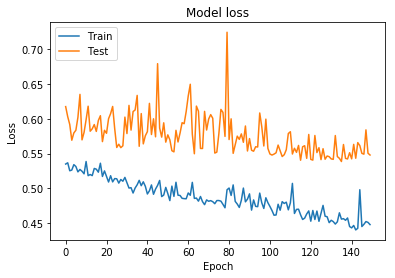

In [61]:
# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction

In [43]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded[1])

1.0
